In [1]:
import pandas as pd
import numpy as np

In [2]:
# 시계열 데이터 생성
np.random.seed(0)
n=100  # 데이터 포인트 수
ar_params = [0.7]  #자기회귀 계수
ma_params = []  # 이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

In [3]:
# AR(1) 모델 생성
data = [0]  # 초기값 설정
for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

In [4]:
# 데이터프레임 생성
df = pd.DataFrame({'Date' : pd.date_range(start='2022-01-01', periods=n, freq='D'), 'Value': data})
df = df.set_index('Date')

In [5]:
# 데이터 확인
print(df.head())

               Value
Date                
2022-01-01  0.000000
2022-01-02  0.400157
2022-01-03  1.258848
2022-01-04  3.122087
2022-01-05  4.053019


In [7]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

In [8]:
# AR(1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

C:\Users\bomi\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
# AR(1) 모델 정보 출력
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -139.573
Method:               Conditional MLE   S.D. of innovations              0.991
Date:                Tue, 13 Jun 2023   AIC                            285.147
Time:                        14:31:30   BIC                            292.932
Sample:                    01-02-2022   HQIC                           288.297
                         - 04-10-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0363      0.100      0.364      0.716      -0.159       0.232
Value.L1       0.7776      0.064     12.115      0.000       0.652       0.903
                                    Roots           

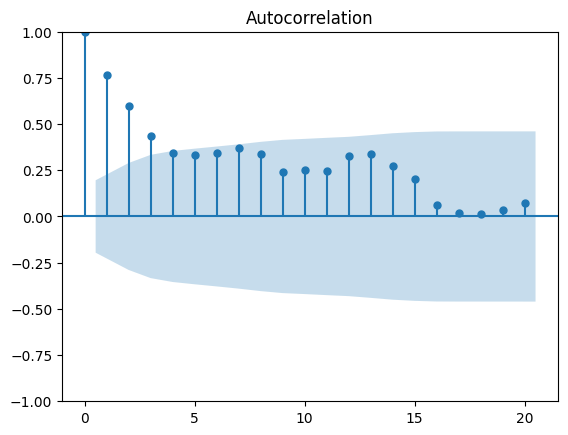

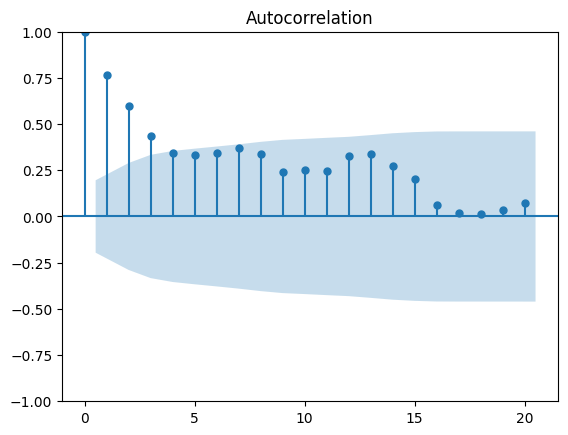

In [10]:
# ACF 그래프 출력
plot_acf(df['Value'], lags=20)